In [1]:
import random
import pandas as pd
import numpy as np 
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

2023-12-06 11:32:47.115102: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 11:32:47.144946: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 11:32:47.145850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 11:32:47.677143: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

# CLUSTERING

In [3]:
data_housing = pd.read_csv('housing.csv')

## 1:Demonstrate  application of k‐MEANS CLUSTERING Using Python

In [4]:
data_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
data_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# data_housing.describe().transpose()

In [7]:
features = ['longitude', 'latitude', 'median_income']
select_df = data_housing[features]
select_df.columns

Index(['longitude', 'latitude', 'median_income'], dtype='object')

In [8]:
X = StandardScaler().fit_transform(select_df)
X[:5]

array([[-1.32783522,  1.05254828,  2.34476576],
       [-1.32284391,  1.04318455,  2.33223796],
       [-1.33282653,  1.03850269,  1.7826994 ],
       [-1.33781784,  1.03850269,  0.93296751],
       [-1.33781784,  1.03850269, -0.012881  ]])

In [9]:
kmeans = KMeans(n_clusters=6, init='k-means++') # number of clusters must be specified
model = kmeans.fit(X)
model

/home/darth-kartikey/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [10]:
centers = model.cluster_centers_
centers[:5]

array([[-0.08011975,  0.22924262, -0.65665019],
       [ 0.872487  , -0.84962215, -0.55984704],
       [ 0.16254728, -0.33915975,  3.50521557],
       [ 0.77062996, -0.82785222,  0.77565851],
       [-1.19158083,  0.97476543,  0.84291141]])

In [11]:
centers.shape

(6, 3)

In [12]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [13]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [14]:
P = pd_centers(features, centers)

In [15]:
P

,longitude,latitude,median_income,prediction
0,-0.080120,0.229243,-0.656650,0
1,0.872487,-0.849622,-0.559847,1
2,0.162547,-0.339160,3.505216,2
3,0.770630,-0.827852,0.775659,3
4,-1.191581,0.974765,0.842911,4
5,-1.160378,1.274082,-0.559831,5


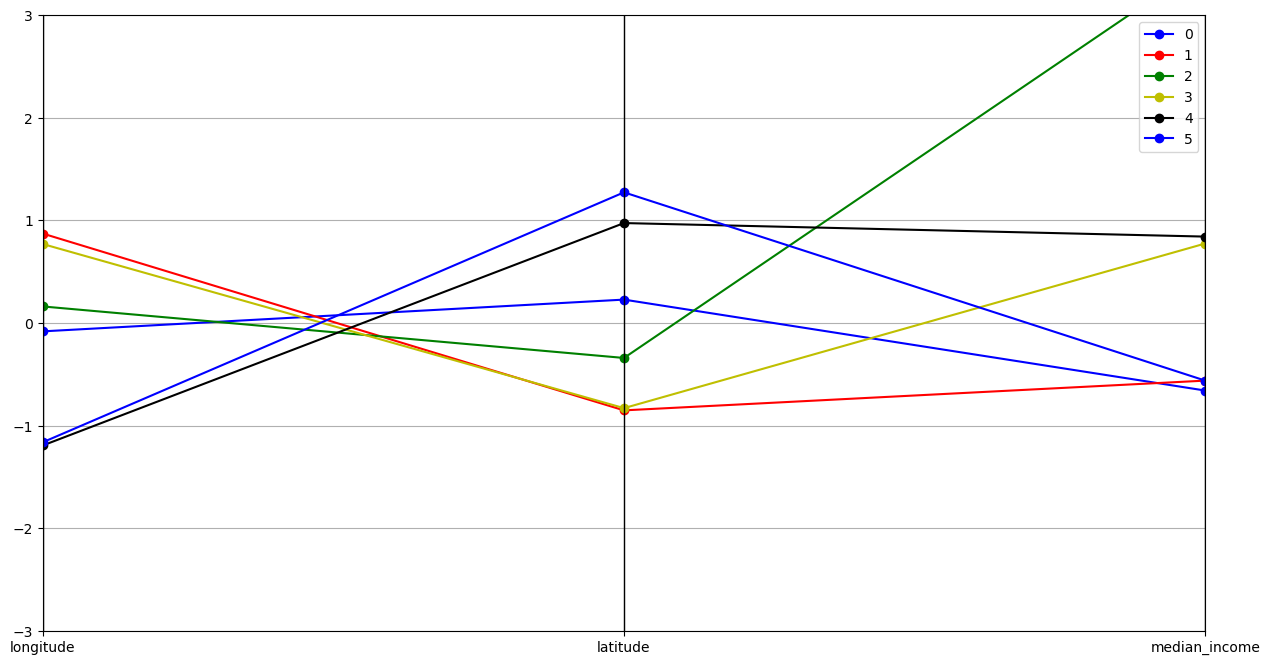

In [16]:
parallel_plot(P)

In [17]:
data_housing['econ_region'] = kmeans.fit_predict(X)
data_housing['econ_region'] = data_housing['econ_region'].astype("category")
data_housing.head()

/home/darth-kartikey/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


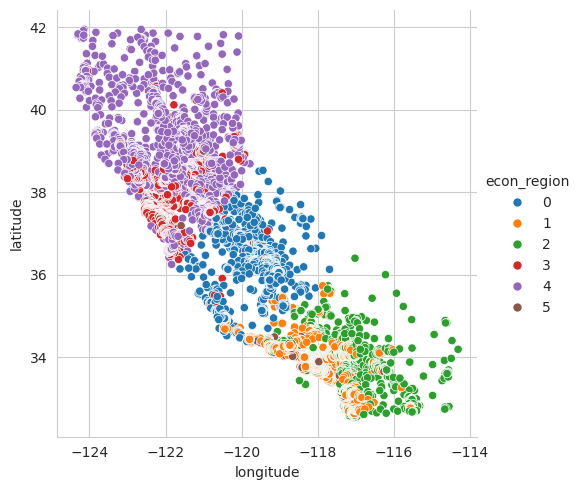

In [18]:
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region', data=data_housing, kind='scatter');

In [19]:
median_attributes = ['econ_region', 'median_house_value', 'median_income', 'housing_median_age']
income_house = data_housing[median_attributes]
income_house.groupby(['econ_region']).describe()

median_house_value                                          \
                         count           mean            std       min   
econ_region                                                              
0                       1657.0  104795.295112   68646.783498   26600.0   
1                       4258.0  270342.899718  102174.180176   14999.0   
2                       6506.0  172122.067169   81406.965410   14999.0   
3                       2802.0  285618.910064  103438.401808   67500.0   
4                       4838.0  156282.769326   86762.347038   14999.0   
5                        579.0  463750.944732   70320.077287  112500.0   

                                                    median_income             \
                  25%       50%       75%       max         count       mean   
econ_region                                                                    
0             61500.0   81600.0  117700.0  500001.0        1657.0   2.620062   
1            192600.0  244800.0  331900.0  500001.0        4258.0   5.274986   
2            117000.0  158150.0  201300.0  500001.0        6506.0   2.777210   
3            206725.0  269800.0  351475.0  500001.0        2802.0   5.488825   
4             94200.0  134050.0  192475.0  500001.0        4838.0   2.815070   
5            452950.0  500001.0  500001.0  500001.0         579.0  10.398594   

             ...                     housing_median_age                        \
             ...        75%      max              count       mean        std   
econ_region  ...                                                                
0            ...   3.208300   5.0100             1657.0  25.590223  11.137718   
1            ...   5.919225   8.2531             4258.0  26.524425  12.255099   
2            ...   3.405450   4.1293             6506.0  30.045343  11.597182   
3            ...   6.100700   9.5551             2802.0  27.172377  13.237211   
4            ...   3.479000   4.5590             4838.0  30.639934  13.433661   
5            ...  11.187300  15.0001              579.0  27.507772  13.940724   

                                           
             min    25%   50%   75%   max  
econ_region                                
0            2.0  17.00  25.0  34.0  52.0  
1            1.0  16.25  27.0  35.0  52.0  
2            1.0  21.00  31.0  38.0  52.0  
3            1.0  17.00  26.0  36.0  52.0  
4            2.0  19.00  30.0  42.0  52.0  
5            2.0  17.00  26.0  37.0  52.0  

[6 rows x 24 columns]